In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("WRIED_p_TCGA_143_147_150_Hahn_N_GenomeWideSNP_6_F07_799994.nocnv_grch38.seg.v2.txt", sep='\t')

In [122]:
df.columns = [col.strip() for col in df.columns]

In [123]:
df['Start'] = df['Start'].astype(int)
df['End'] = df['End'].astype(int)
df['Num_Probes'] = df['Num_Probes'].astype(int)
df['Segment_Mean'] = df['Segment_Mean'].astype(float)

In [124]:
df.dtypes

GDC_Aliquot      object
Chromosome       object
Start             int64
End               int64
Num_Probes        int64
Segment_Mean    float64
dtype: object

In [125]:
df.head()

,GDC_Aliquot,Chromosome,Start,End,Num_Probes,Segment_Mean
0,a76e695c-a58b-40a7-9396-7e88734075f2,1,3301765,247650984,128894,0.0102
1,a76e695c-a58b-40a7-9396-7e88734075f2,2,480597,241537572,131362,0.0132
2,a76e695c-a58b-40a7-9396-7e88734075f2,3,2170634,197812401,106517,0.0111
3,a76e695c-a58b-40a7-9396-7e88734075f2,4,1059384,78381210,43006,0.0133
4,a76e695c-a58b-40a7-9396-7e88734075f2,4,78381703,78383072,2,-1.8840


In [126]:
# df = df[df['Num_Probes'] >= 5]

In [127]:
df.shape

(41, 6)

In [128]:
def classify(mean):
    if mean > 0.25:
        return "Amplified"
    elif mean < -0.25:
        return "Deleted"
    else:
        return "Normal"

df['CNV_Type'] = df['Segment_Mean'].apply(classify)

In [129]:
df.head()

,GDC_Aliquot,Chromosome,Start,End,Num_Probes,Segment_Mean,CNV_Type
0,a76e695c-a58b-40a7-9396-7e88734075f2,1,3301765,247650984,128894,0.0102,Normal
1,a76e695c-a58b-40a7-9396-7e88734075f2,2,480597,241537572,131362,0.0132,Normal
2,a76e695c-a58b-40a7-9396-7e88734075f2,3,2170634,197812401,106517,0.0111,Normal
3,a76e695c-a58b-40a7-9396-7e88734075f2,4,1059384,78381210,43006,0.0133,Normal
4,a76e695c-a58b-40a7-9396-7e88734075f2,4,78381703,78383072,2,-1.8840,Deleted


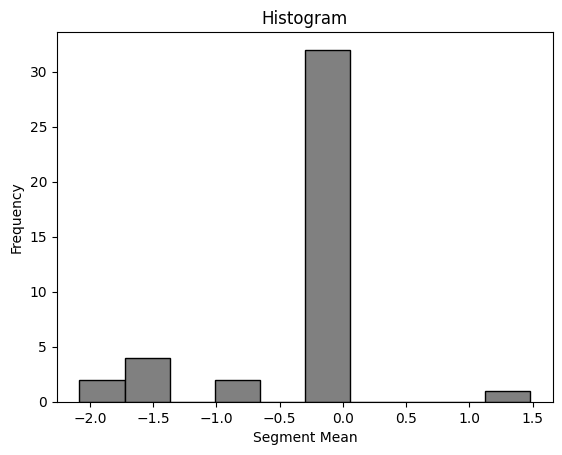

In [130]:
plt.hist(df['Segment_Mean'], color='gray', edgecolor='black')

plt.title('Histogram')
plt.xlabel('Segment Mean')
plt.ylabel('Frequency')

plt.show()

In [131]:
cnv_types = df['CNV_Type'].value_counts()
cnv_types

CNV_Type
Normal       32
Deleted       8
Amplified     1
Name: count, dtype: int64

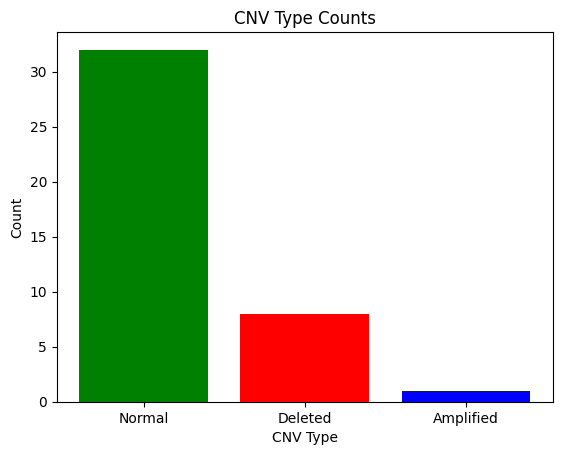

In [132]:
cnv_labels = cnv_types.index
cnv_values = cnv_types.values

bar_colors = ['green', 'red', 'blue']

plt.bar(cnv_labels, cnv_values, color=bar_colors)

plt.title('CNV Type Counts')
plt.xlabel('CNV Type')
plt.ylabel('Count')

plt.show()